In [149]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')


\begin{alignat}{5}
         & \arg\!\min_{\mathcal{D}, \mathcal{R}} \|X \ -&\mathcal{D}\mathcal{R}\|_F^2  + &\lambda \sum_{i=1}^k  \|\ r_i\|_0     \quad   \\
         &\text{s.t.}  \quad  &\|d_j\|_2 \leq 1&, \forall j=1, ...,n  \quad 
\end{alignat}

$$\|X \ -\mathcal{D}\mathcal{R}\|_F^2 = \|X - D_S D_S^+ X\|_F^2$$

In [208]:
# random matrix (can be later an image for denoising!)
d = 20
K = 35
n = 27

X = np.random.uniform(low=-10, high=10, size=(d, K))
D = np.random.uniform(low=-10, high=10, size=(d, n))

# R will be n x K

# normalize D s.t. that columns of D have l2 norm = 1
for j in range(n):
    D[:, j] /= np.sum(D[:, j])

In [151]:
np.sum(D, axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [152]:
X.shape

(20, 35)

In [153]:
# greedy algorithm
num_steps = 25
S = np.zeros(num_steps, dtype=int)
val_trace = []
for step in range(num_steps):
    
    cur_sel_columns = list(S[:step])
    # find argmin
    norms = np.zeros(D.shape[1]) + 9999.9
    for i in range(D.shape[1]):
        if i in cur_sel_columns:
            continue
        DS = D[:, cur_sel_columns+[i]]
        
        norms[i] = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
    S[step] = np.argmin(norms)
    
    # add current norm value for the current dict
    cur_sel_columns = list(S[:step+1])
    DS = D[:, cur_sel_columns]
    obj_val = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
    val_trace.append(obj_val)
    print(cur_sel_columns)

[25]
[25, 13]
[25, 13, 23]
[25, 13, 23, 0]
[25, 13, 23, 0, 5]
[25, 13, 23, 0, 5, 11]
[25, 13, 23, 0, 5, 11, 26]
[25, 13, 23, 0, 5, 11, 26, 10]
[25, 13, 23, 0, 5, 11, 26, 10, 4]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6, 3]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6, 3, 24]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6, 3, 24, 18]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6, 3, 24, 18, 12]
[25, 13, 23, 0, 5, 11, 26, 10, 4, 16, 8, 1, 20, 9, 7, 19, 22, 6, 3

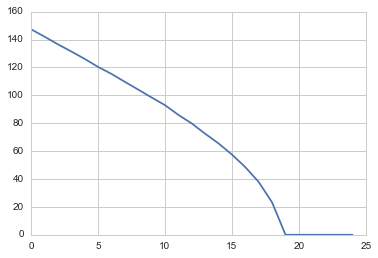

In [154]:
%matplotlib inline
plt.plot(val_trace)

In [155]:
D.shape

(20, 27)

In [156]:
def alpha_weakly_greedy(X, D, t):
    S = np.zeros(num_steps, dtype=int)
    val_trace = []
    for step in range(t):

        cur_sel_columns = list(S[:step])
        # find argmin
        norms = np.zeros(D.shape[1]) + 9999.9
        for i in range(D.shape[1]):
            if i in cur_sel_columns:
                continue
            DS = D[:, cur_sel_columns+[i]]

            norms[i] = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
        S[step] = np.argmin(norms)

        # add current norm value for the current dict
        cur_sel_columns = list(S[:step+1])
        DS = D[:, cur_sel_columns]
        obj_val = np.linalg.norm(X - np.dot(DS, np.dot(np.linalg.pinv(DS), X)), 'fro')
        val_trace.append(obj_val)
    return S[:t], val_trace[-1]

In [389]:
t = 4
num_steps=200

In [396]:
val_trace = []
def get_new_X(S):
    cand_cols = list(set(np.arange(0, K)) - set(S))
    q = cand_cols[np.random.randint(len(cand_cols))]
    S[np.random.randint(len(S))] = q
    return X[:, S]

# greedy algorithm to perform dictionary selection!
D0 = np.random.uniform(low=-1, high=1, size=(d, n))
# normalize over columns
for j in range(n):
    D0[:, j] /= np.sum(D0[:, j])
    
# this should return all 1's
eps=10**-10
assert(np.all(np.abs(np.sum(D0, axis=0) - 1.) < eps))


# first value is just the dict and the inferred repr from it!
R = np.dot(np.linalg.pinv(D0), X)

obj_Value_old = np.linalg.norm(X - np.dot(D0, R), 'fro')
val_trace.append(obj_value_old)

# solve alpha weakly for this random starting dict
S0, obj_value_old = alpha_weakly_greedy(X, D0, t)
val_trace.append(obj_value_old)

S = S0.copy()

for i in range(num_steps):
    # loop for new dictionaries
    # get new candidate dictionary!
    Xnew = get_new_X(S)

    # new dict
    D = Xnew.copy()
    
    # normalize!
    for j in range(D.shape[1]):
        D[:, j] /= np.sum(D[:, j])

    # this should return all 1's
    eps=10**-10
    assert(np.all(np.abs(np.sum(D, axis=0) - 1.) < eps))
    
    
    # solve alpha greedy!
    S, obj_value_new = alpha_weakly_greedy(X, D, t)
    
    # if new is better, take it!
    if(obj_value_new < obj_value_old):
        S0 = S.copy()
        D0 = D.copy()
        obj_value_old = obj_value_new
    val_trace.append(obj_value_old)

# final set
#S0, D0, obj_value_old

In [397]:
S

array([1, 3, 2, 0])

In [398]:
obj_value

125.60147110862168

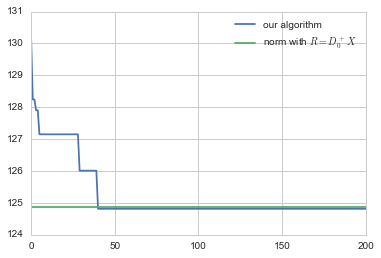

In [399]:
plt.plot(val_trace[1:], label='our algorithm')
plt.plot([0, num_steps],[val_trace[0], val_trace[0]], label='norm with $ R = D_0^+X$')
plt.legend()

In [402]:
# new with add. greedy search!

val_trace = []
def get_new_X(S, X, Dcur, Rcur):
    cand_cols = list(set(np.arange(0, K)) - set(S))
    
    # get the one
    
    q = cand_cols[np.random.randint(len(cand_cols))]
    
    rand_index = np.random.randint(len(S))
    
    # proposal 1
    #S[rand_index] = q
    
    # proposal 2 (find the best column to set which minimized ||Xnew - Dcur Rcur||_F^2)
    qbest = cand_cols[0]
    norm_old = 9999999.9 #+inf
    for q in cand_cols:
        S_proposed = S.copy()
        S_proposed[rand_index] = q
        X_proposed = np.zeros(X.shape)
        X_proposed[:, S_proposed] = X[:, S_proposed]
        norm_val = np.linalg.norm(X_proposed - np.dot(Dcur, Rcur), 'fro')
        if norm_val < norm_old:
            qbest = q
            norm_old = norm_val
            
    S[rand_index] = qbest
    X_new = np.zeros(X.shape)
    X_new[:, S] = X[:, S]
    return X_new

# greedy algorithm to perform dictionary selection!
D0 = np.random.uniform(low=-1, high=1, size=(d, n))
# normalize over columns
for j in range(n):
    D0[:, j] /= np.sum(D0[:, j])
    
# this should return all 1's
eps=10**-10
assert(np.all(np.abs(np.sum(D0, axis=0) - 1.) < eps))


# first value is just the dict and the inferred repr from it!
R = np.dot(np.linalg.pinv(D0), X)

obj_Value_old = np.linalg.norm(X - np.dot(D0, R), 'fro')
val_trace.append(obj_value_old)

# solve alpha weakly for this random starting dict
S0, obj_value_old = alpha_weakly_greedy(X, D0, t)
val_trace.append(obj_value_old)

S = S0.copy()

for i in range(num_steps):
    # loop for new dictionaries
    # get new candidate dictionary!
    D0plus = np.linalg.pinv(D0)
    # set here maybe all other rows to zeros...
    R0 = np.dot(D0plus, X)
    Xnew = get_new_X(S, X, D0, R0)

    # new dict (proposal 1)
    D = Xnew.copy()
    # new dict (proposal 2)
    D = np.dot(Xnew, np.linalg.pinv(R0))
    
    # normalize!
    for j in range(D.shape[1]):
        D[:, j] /= np.sum(D[:, j])

    # this should return all 1's
    eps=10**-10
    assert(np.all(np.abs(np.sum(D, axis=0) - 1.) < eps))
    
    
    # solve alpha greedy!
    S, obj_value_new = alpha_weakly_greedy(X, D, t)
    
    # if new is better, take it!
    if(obj_value_new < obj_value_old):
        S0 = S.copy()
        D0 = D.copy()
        obj_value_old = obj_value_new
    val_trace.append(obj_value_old)

# final set
#S0, D0, obj_value_old

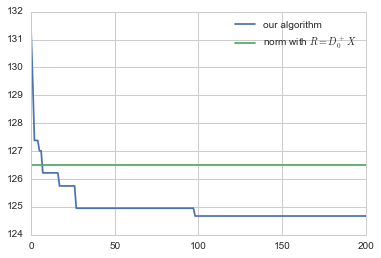

In [403]:
plt.plot(val_trace[1:], label='our algorithm')
plt.plot([0, num_steps],[val_trace[0], val_trace[0]], label='norm with $ R = D_0^+X$')
plt.legend()

In [380]:
R0.shape

(27, 35)

In [220]:
D.shape

(20, 4)

In [221]:
X.shape

(20, 35)

In [222]:
D0.shape

(20, 4)

In [223]:
D0plus.shape

(4, 20)